In [10]:
# source: https://github.com/carlosgorlongaiatto/LabLOCP_A_Project/blob/main/project.ipynb

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("dataset_3.csv", infer_datetime_format=True, parse_dates=True)
df

,longitude,latitude,year,month,day,hour,minute,second,magnitude,depth
0,33.260,40.980,1936,9,22,11,56,56.0,5.2,60.00
1,40.430,39.940,1937,12,7,9,31,4.0,5.2,60.00
2,33.880,41.080,1938,5,31,19,34,54.0,5.2,60.00
3,40.000,39.410,1940,5,29,15,24,52.0,5.2,60.00
4,39.430,39.740,1941,11,12,10,4,59.0,6.0,70.00
...,...,...,...,...,...,...,...,...,...,...
1928,30.946,40.808,2022,12,3,4,59,20.0,4.1,14.20
1929,38.684,39.854,2022,12,10,10,29,26.0,3.6,7.05
1930,27.110,40.364,2022,12,13,3,21,16.0,4.3,12.12
1931,40.537,39.859,2022,12,18,8,57,49.0,3.9,10.21


In [3]:
df.magnitude = df.magnitude.round(1)
df.date = pd.to_datetime(df.date)
df = df[df['date'] < '2023-01-01']

In [3]:
magnitudes = np.arange(3.5, 8, 0.5)
counts = np.zeros(magnitudes.shape[0])

In [4]:
i = 0
for m in magnitudes:
    counts[i] = df[df['magnitude'] >= m]['magnitude'].count()
    i += 1

In [5]:
# normalize counts
norm = np.sum(counts)   
counts_n = counts/norm

In [6]:
# filter by removing empty bins for the log plot
counts_n_f = counts_n[counts_n!=0]
magnitudes_f = magnitudes[counts_n!=0]

In [7]:
# compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))

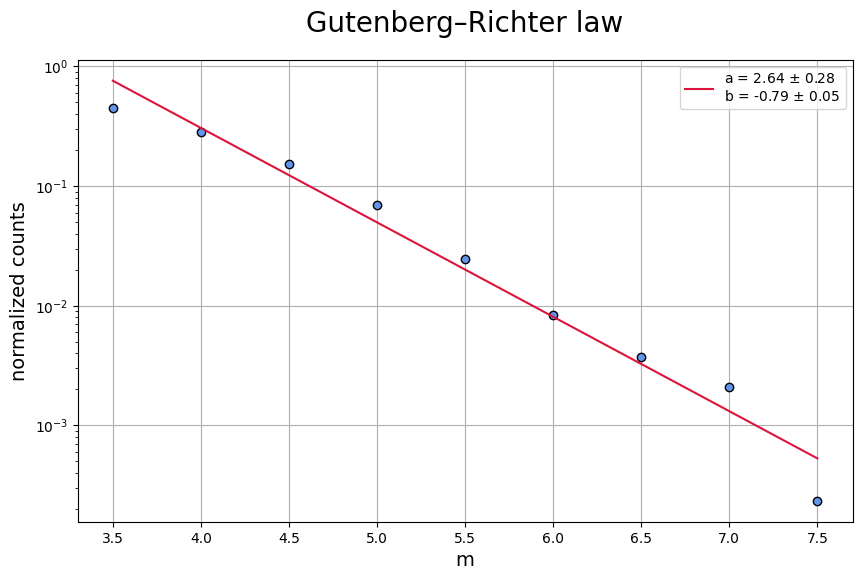

In [8]:
# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
# plot histogram
ax.plot(magnitudes_f, counts_n_f, 'o', mfc='cornflowerblue', mec='black')
# plot linear regression
label = r'a = {:.2f} $\pm$ {:.2f}'.format(reg.intercept, reg.intercept_stderr) + '\n' + r'b = {:.2f} $\pm$ {:.2f}'.format(reg.slope, reg.stderr)
plt.plot(magnitudes_f, 10**(reg.intercept + reg.slope*magnitudes_f), 'crimson', label=label)
ax.set_yscale('log')
ax.set_xlabel('m', fontsize=14)
ax.set_ylabel(r'normalized counts', fontsize=14)
ax.set_title('Gutenberg–Richter law', fontsize=20, pad=20)
plt.legend()
plt.grid()
plt.show()